<h1>Indice</h1>
    <ul>
        <li>EDA
            <ul>
                <li><a href="#final_score_analysis">Final Score Analysis</a></li>
                <li><a href="#correlation">Final Score Correlation</a></li>
                <li><a href="#variables_analysis">Final Score e fattori impattanti</a>
                    <ul>
                        <li><a href="#personal">Dati Anagrafici</a></li>
                        <li><a href="#school">Istituti Scolastici</a></li>
                        <li><a href="#family">Ambiente Familiare</a></li>
                        <li><a href="#time_management">Gestione del Tempo</a></li>
                        <li><a href="#alchol">Consumo di Alcolici</a></li>
                        <li><a href="#other_analysis">Ulteriori Analisi</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li>PDA
            <ul>
                <li><a href="#reduce_dim">Riduzione della Dimensionalità</a></li>
                <li><a href="#train">Ottimizzazione dei Parametri e Addestramento</a></li>
                <li><a href="#valutation">Valutazione</a></li>
                <li><a href="#f_importance">Importanza delle features</a></li>
            </ul>
        </li>
    </ul>

In [1]:
# import library 

import warnings
import pandas as pd
import numpy as np
import time
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from scipy.stats import randint, uniform
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error


<h1><a id="eda">EDA</a></h1>

### Import and Check Dataset

In [2]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [3]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [4]:
por.shape

(649, 33)

In [5]:
len(por[por.duplicated()])

0

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<h3><a id="final_score_analysis">Final Score Analysis</a></h3>

In [8]:
print("Media dei voti: ", round(por.G3.mean(), 2))

Media dei voti:  11.91


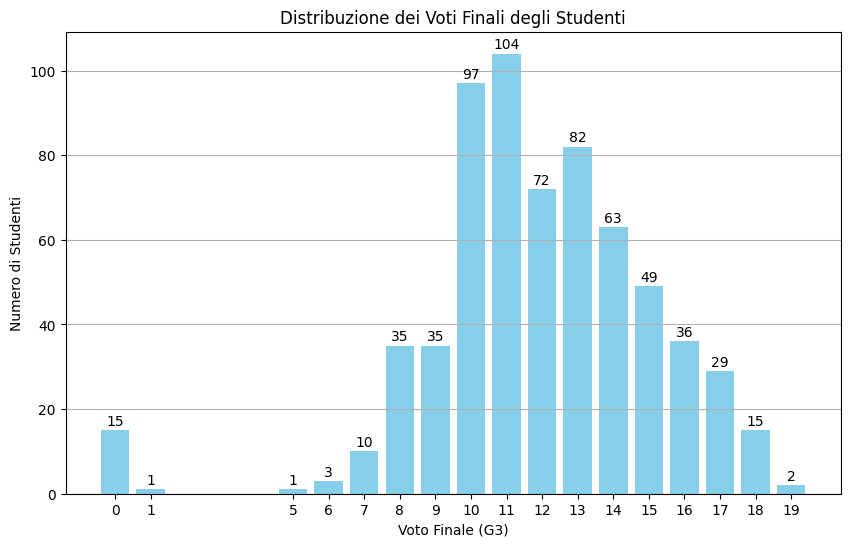

In [9]:
# Calcola il numero di studenti per ciascun voto distintivo
voti_distinti = sorted(por['G3'].unique())  # Ottieni i voti distinti e ordina
numero_studenti = por['G3'].value_counts().sort_index()  # Conta il numero di studenti per ciascun voto e ordina per voto

# Crea il grafico a istogramma
plt.figure(figsize=(10, 6))
bars = plt.bar(voti_distinti, numero_studenti, color='skyblue')

# Aggiungi il totale degli studenti sopra ogni barra
for bar, count in zip(bars, numero_studenti):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Voto Finale (G3)')
plt.ylabel('Numero di Studenti')
plt.title('Distribuzione dei Voti Finali degli Studenti')
plt.xticks(voti_distinti)
plt.grid(axis='y')
plt.show()

Binning della variabile 'G3' per rendere più leggibile l'andamento dei voti

In [10]:
bins = [0, 4, 8, 12, 16, 20]
#labels = ['Scarso', 'Mediocre', 'Sufficiente', 'Buono', 'Ottimo']
labels = ['Ottimo' , 'Buono', 'Sufficiente', 'Mediocre', 'Scarso']

# Classifica i voti 'G3' in queste fasce
por['score_range'] = pd.cut(por['G3'], bins=bins, labels=labels, right=False)

# Calcola la percentuale di studenti in ogni fascia
percentage_range = por['score_range'].value_counts(normalize=True) * 100

percentage_range = percentage_range.reindex(labels)

# Crea una palette di colori che va dal rosso al verde
pal = sns.color_palette("RdYlGn", len(labels))

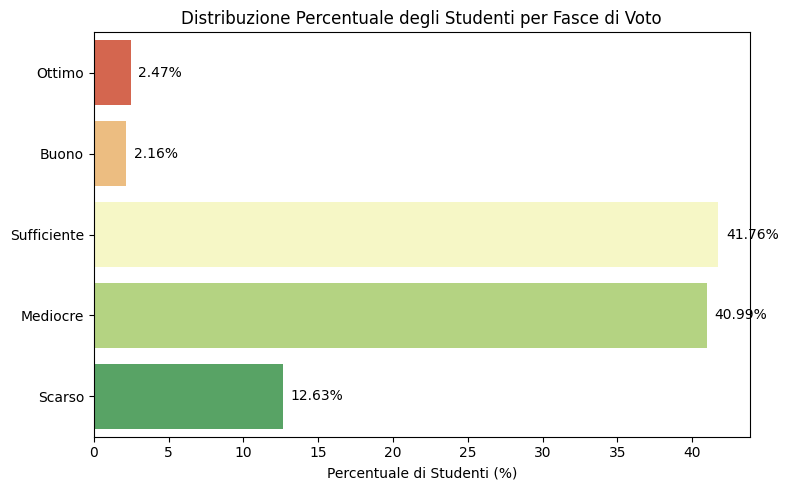

In [11]:
# Crea un istogramma delle percentuali
plt.figure(figsize=(8, 5))

sns.barplot(x=percentage_range.values, y=percentage_range.index, hue=percentage_range.index, palette=pal)

# Aggiungi le etichette e il titolo
plt.xlabel('Percentuale di Studenti (%)')
plt.ylabel('')
plt.title('Distribuzione Percentuale degli Studenti per Fasce di Voto')

# Aggiungi i valori sopra ogni barra
for i in range(len(percentage_range)):
    plt.text(percentage_range.values[i] + 0.5, i, f'{percentage_range.values[i]:.2f}%', ha='left', va='center', fontsize=10, color='black')

#plt.subplots_adjust(right=1.2)
plt.tight_layout()
plt.show()

In [12]:
por = por.drop(labels='score_range', axis=1)

<h3><a id="correlation">Final Score Correlation</a></h3>

##### Encoding categorical variables

Data la grande quantità di variabili categoriche, è stata effettuata un encoding di queste variabile, prima di generare la matrice di correlazione.

In [13]:
por_enc = por.copy()

In [14]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [15]:
categorical_columns = por_enc.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por_enc.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [16]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por_enc[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por_enc = pd.concat([por_enc, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por_enc.drop(columns=[col], inplace=True)

In [17]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por_enc[col] = label_encoders[col].fit_transform(por_enc[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

##### G3 - Correlation

In [18]:
# Calcolare la matrice di correlazione
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)


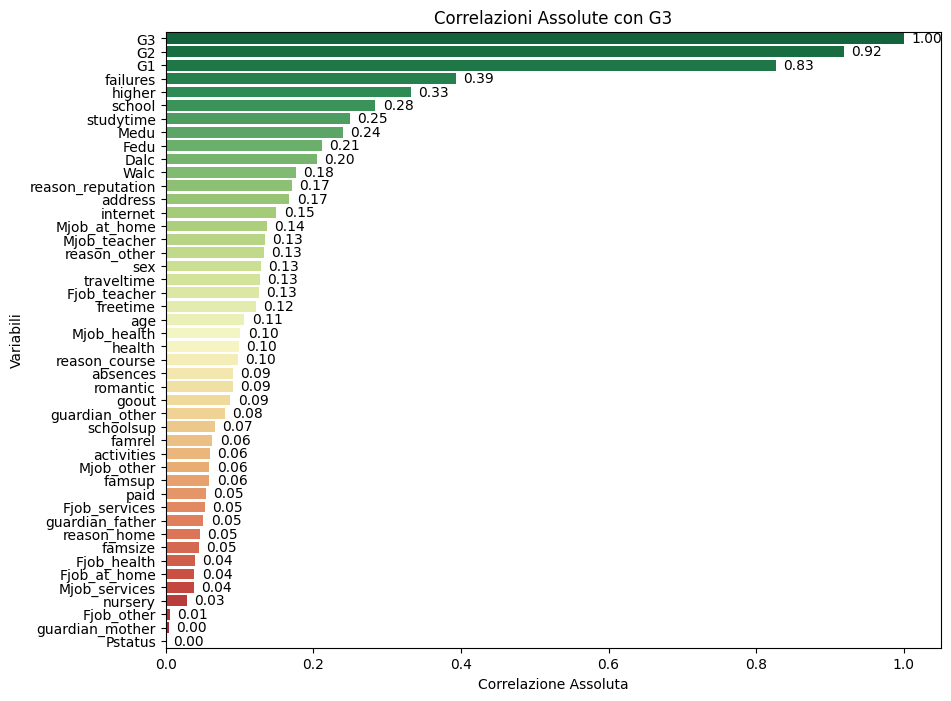

In [19]:
plt.figure(figsize=(10, 8))

# Crea una palette di colori che va dal verde al rosso
palette = sns.color_palette("RdYlGn", len(g3_correlations_abs))

# Inverti la palette per avere il verde in alto e il rosso in basso
sns.barplot(x=g3_correlations_abs.values, y=g3_correlations_abs.index, hue=g3_correlations_abs.index, orient='h', palette=palette[::-1])
plt.title('Correlazioni Assolute con G3')
plt.xlabel('Correlazione Assoluta')
plt.ylabel('Variabili')

# Aggiungi le annotazioni di valore utilizzando Matplotlib
for i, v in enumerate(g3_correlations_abs):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.show()

<h3><a id="variables_analysis">Analisi dei fattori impattanti sul voto finale</a></h3>


<h5><a id="personal">Dati Anagrafici</a></h5>

In [20]:
print("Media voti per sesso\n ", por.groupby("sex")["G3"].mean())

Media voti per sesso
  sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


In [21]:
print("Media voti per età e sesso\n ", por.groupby(["age", "sex"])["G3"].mean())

Media voti per età e sesso
  age  sex
15   F      12.000000
     M      12.218182
16   F      12.419048
     M      11.375000
17   F      12.884956
     M      11.212121
18   F      12.047619
     M      11.357143
19   F       9.368421
     M       9.769231
20   F      11.750000
     M      12.500000
21   F      12.000000
     M      10.000000
22   M       5.000000
Name: G3, dtype: float64


In [22]:
# Calcola la media dei voti dei figli per ciascuna combinazione di età e sesso
mean_scores = por.groupby(["age", "sex"])["G3"].mean().unstack()

# Calcola il numero di studenti per età e sesso
student_count = por.groupby(["age", "sex"]).size().unstack()

# Controlla per valori NaN e sostituiscili con 0
mean_scores = mean_scores.fillna(0)
student_count = student_count.fillna(0)

# Indici per le età
ages = mean_scores.index

# Crea le tracce per il grafico a barre
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['F'],
    name='F',
    marker_color='#FF6961',
    hoverinfo='y'
))

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['M'],
    name='M',
    marker_color='#A2CFFE',
    hoverinfo='y'
))

# Crea le tracce per le curve di distribuzione degli studenti
fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['F'],
    name='Distr F',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='red'),
    hoverinfo='y'
))

fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['M'],
    name='Dist M',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='blue'),
    hoverinfo='y'
))

# Imposta i layout
fig.update_layout(
    title='Media voti e Distribuzione studenti per età e sesso',
    xaxis=dict(title='Età'),
    yaxis=dict(title='Media voti finali'),
    yaxis2=dict(title='n° studenti', overlaying='y', side='right'),
    barmode='group',
    hovermode='x',
    legend=dict(
        x=1.05,
        y=1
    )
)

# Mostra il grafico
fig.show()

<h5><a id="school">Istituti Scolastici</a></h5>

In [23]:
print("Istituti scolastici ", por.school.unique())

Istituti scolastici  ['GP' 'MS']


In [24]:
# Numero totale di studenti per ogni scuola
total_students_per_school = por.groupby('school').size().reset_index(name='counts')
print(total_students_per_school)

  school  counts
0     GP     423
1     MS     226


In [25]:
# Percentuale di ripetenti per scuola


# Contare il numero di bocciati (failures > 1) per ogni scuola
failed_students_per_school = por[por['failures'] > 1].groupby('school').size().reset_index(name='failed_students')

# Unire i due dataframes su 'school'
school_failures = pd.merge(total_students_per_school, failed_students_per_school, on='school', how='left')

# Riempire i valori NaN con 0 (caso in cui non ci siano bocciati in una scuola)
school_failures['failed_students'] = school_failures['failed_students'].fillna(0)

# Calcolare la percentuale di bocciati
school_failures['failure_percentage'] = (school_failures['failed_students'] / school_failures['counts']) * 100

# Mostra il risultato
print(school_failures)

  school  counts  failed_students  failure_percentage
0     GP     423               18            4.255319
1     MS     226               12            5.309735


In [26]:
# media degli studenti che vogliono proseguire gli studi per scuola

# Filtrare gli studenti che desiderano proseguire con studi superiori
higher_students = por[por['higher'] == 'yes']

# Raggruppare per scuola e calcolare la media dei voti finali (G3)
mean_g3_higher = higher_students.groupby('school')['G3'].mean().reset_index(name='mean_G3_by_higher')

# Mostra il risultato
print(mean_g3_higher)

  school  mean_G3_by_higher
0     GP          12.861893
1     MS          11.063492


In [27]:
# Relazione tra scelta della scuola e voto finale plotly

# Raggruppare per scuola e reason, poi calcolare la media dei voti finali (G3)
mean_g3_by_reason = por.groupby(['school', 'reason'])['G3'].mean().unstack()

# Configurazione del grafico
fig = go.Figure()

# Larghezza delle barre
bar_width = 0.16  # Puoi regolare questo valore per stringere le barre

# Creare le tracce per ciascun motivo
for reason in mean_g3_by_reason.columns:
    fig.add_trace(go.Bar(
        x=mean_g3_by_reason.index,
        y=mean_g3_by_reason[reason],
        name=reason,
        width=[bar_width] * len(mean_g3_by_reason.index)  # Imposta la larghezza delle barre
    ))

# Impostare il layout
fig.update_layout(
    title='Media dei voti finali per motivo della scelta della scuola',
    xaxis=dict(title='Scuola'),
    yaxis=dict(title='Media dei voti finali (G3)'),
    barmode='group'
)

# Mostrare il grafico
fig.show()


<h5><a id="family">Ambiente Familiare</a></h5>

In [28]:
print("Grado di educazione medio dei padri: ", round(por.Fedu.mean(), 2))
print("Grado di educazione medio delle madri: ", round(por.Medu.mean(), 2))

Grado di educazione medio dei padri:  2.31
Grado di educazione medio delle madri:  2.51


In [29]:
# Grafico che rappresenta l'andamento scolastico dei figli rispetto al livello d'istruzione dei genitori

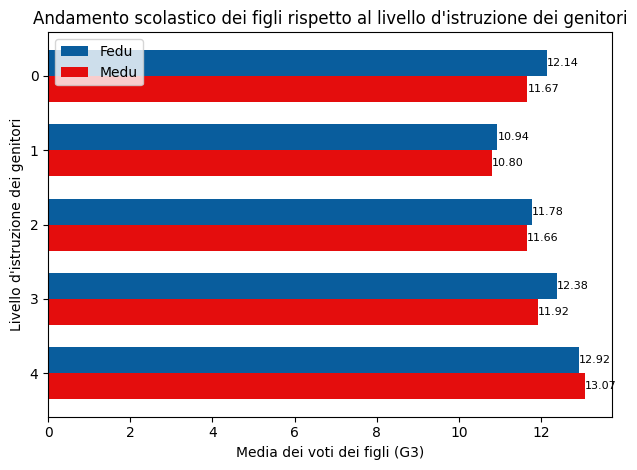

In [30]:
# Calcola la media dei voti dei figli per ciascun livello d'istruzione dei genitori
fedu_mean = por.groupby('Fedu')['G3'].mean()
medu_mean = por.groupby('Medu')['G3'].mean()

# Crea un array di valori unici per Fedu e Medu
education_levels = np.arange(5)

# Imposta l'altezza delle barre e la posizione delle barre parallele
bar_height = 0.35
index = np.arange(len(education_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Colori per Fedu e Medu
color_fedu = '#095D9D'
color_medu = '#E40D0D'

# Crea le barre orizzontali per Fedu e Medu con colori specificati
bars1 = ax.barh(index, fedu_mean, bar_height, label='Fedu', color=color_fedu)
bars2 = ax.barh(index + bar_height, medu_mean, bar_height, label='Medu', color=color_medu)

# Aggiungi etichette e titolo
ax.set_ylabel("Livello d'istruzione dei genitori")
ax.set_xlabel('Media dei voti dei figli (G3)')
ax.set_title("Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori")
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(education_levels)
ax.invert_yaxis()  # Inverti l'asse y per avere il livello d'istruzione più alto in cima
ax.legend()

# Aggiungi i valori accanto a ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

for bar in bars2:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()


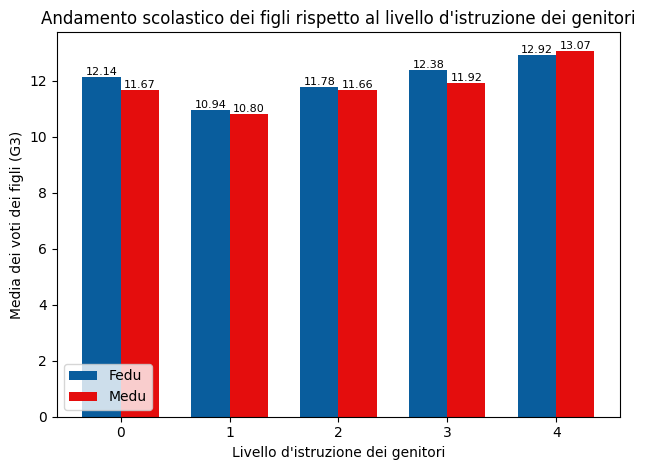

In [31]:
# Crea un array di valori unici per Fedu e Medu
education_levels = np.arange(5)

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_width = 0.35
index = np.arange(len(education_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Colori per Fedu e Medu
color_fedu = '#095D9D'
color_medu = '#E40D0D'

# Crea le barre verticali per Fedu e Medu con colori specificati
bars1 = ax.bar(index, fedu_mean, bar_width, label='Fedu', color=color_fedu)
bars2 = ax.bar(index + bar_width, medu_mean, bar_width, label='Medu', color=color_medu)

# Aggiungi etichette e titolo
ax.set_xlabel("Livello d'istruzione dei genitori")
ax.set_ylabel('Media dei voti dei figli (G3)')
ax.set_title("Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(education_levels)
ax.legend()

# Aggiungi i valori sopra ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()


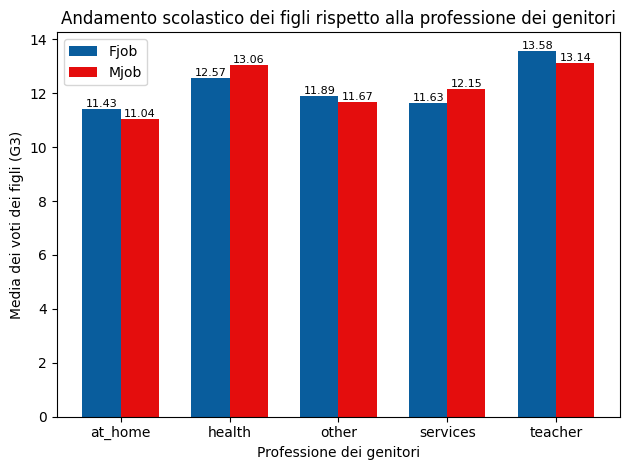

In [32]:
# Calcola la media dei voti dei figli per ciascun livello d'istruzione dei genitori
fjob_mean = por.groupby('Fjob')['G3'].mean()
mjob_mean = por.groupby('Mjob')['G3'].mean()

# Crea un array di valori unici per Fjob e Mjob
job_levels = sorted(por['Fjob'].unique())

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_width = 0.35
index = np.arange(len(job_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Colori per Fjob e Mjob
color_fjob = '#095D9D'
color_mjob = '#E40D0D'

# Crea le barre verticali per Fjob e Mjob con colori specificati
bars1 = ax.bar(index, fjob_mean[job_levels], bar_width, label='Fjob', color=color_fjob)
bars2 = ax.bar(index + bar_width, mjob_mean[job_levels], bar_width, label='Mjob', color=color_mjob)

# Aggiungi etichette e titolo
ax.set_xlabel("Professione dei genitori")
ax.set_ylabel('Media dei voti dei figli (G3)')
ax.set_title("Andamento scolastico dei figli rispetto alla professione dei genitori")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(job_levels)
ax.legend()

# Aggiungi i valori sopra ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()

<h5><a id="time_management">Gestione del tempo</a></h5>


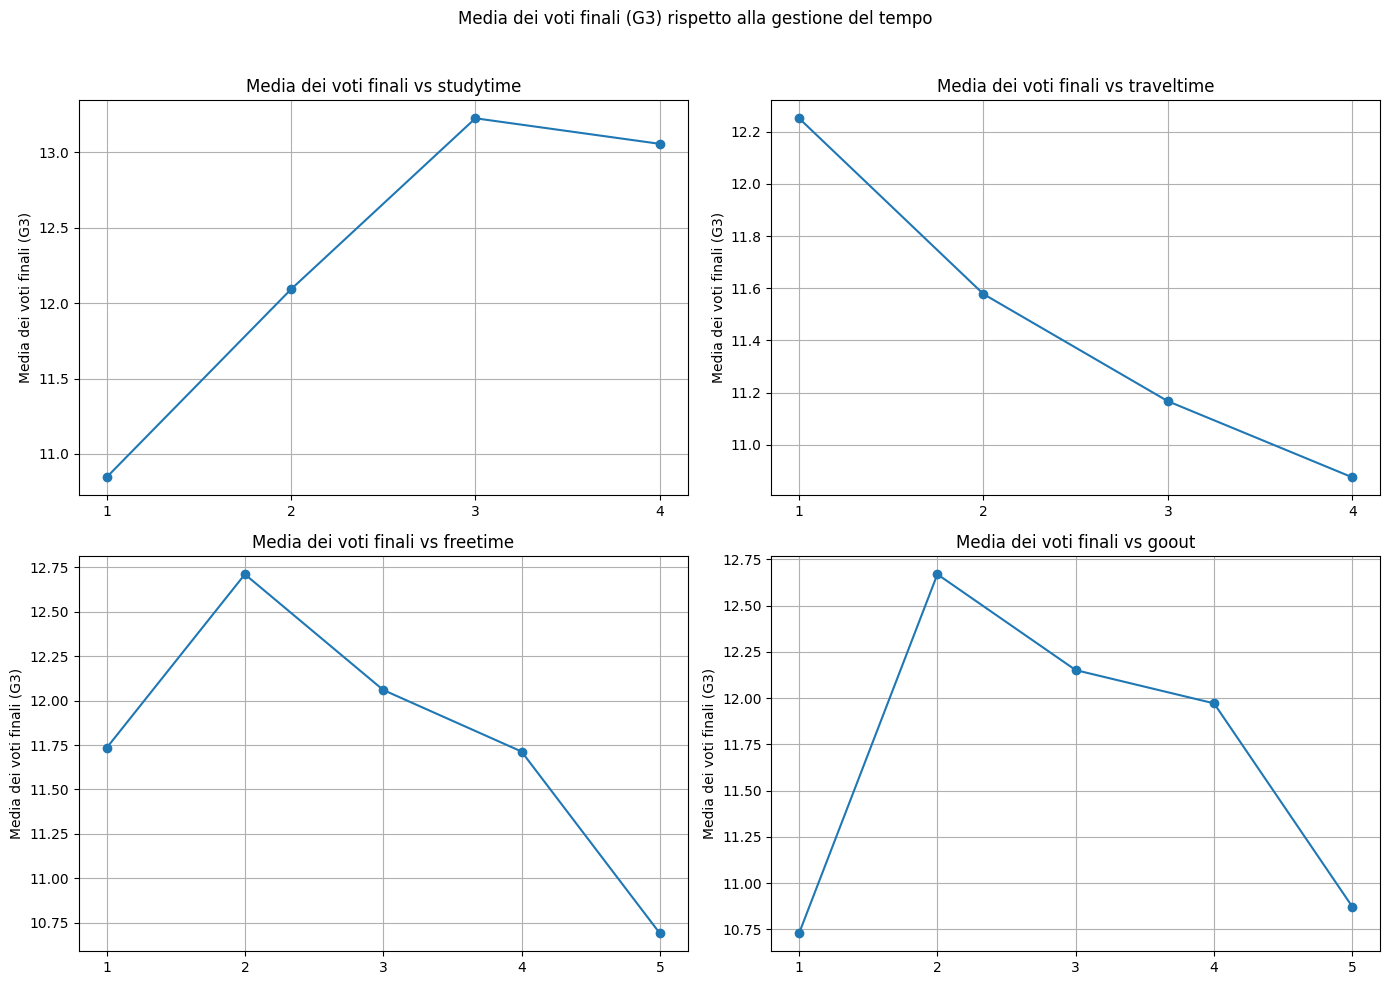

In [33]:
time_management_columns = ['studytime', 'traveltime', 'freetime', 'goout']

# Crea una figura e assi per i 4 grafici
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Media dei voti finali (G3) rispetto alla gestione del tempo')

# Mappa degli assi per facilitare il posizionamento
axes_map = {
    'studytime': (0, 0),
    'traveltime': (0, 1),
    'freetime': (1, 0),
    'goout': (1, 1)
}

# Genera i grafici per ciascuna colonna di gestione del tempo
for col in time_management_columns:
    mean_scores = por.groupby(col)["G3"].mean()
    ax = axs[axes_map[col][0], axes_map[col][1]]
    ax.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-')
    ax.set_title(f'Media dei voti finali vs {col}')
    #ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Media dei voti finali (G3)')
    ax.grid(True)
    
    # Imposta solo i valori interi sull'asse x
    # ax.set_xticks(range(int(mean_scores.index.min()), int(mean_scores.index.max()) + 1))
    
    # Personalizza i valori dell'asse x per ciascun grafico
    xticks = range(int(mean_scores.index.min()), int(mean_scores.index.max()) + 1)
    ax.set_xticks(xticks)  # Imposta i valori degli xticks
    ax.set_xticklabels([str(tick) for tick in xticks])  # Imposta le etichette degli xticks


# Aggiungi un po' di spazio tra i grafici
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

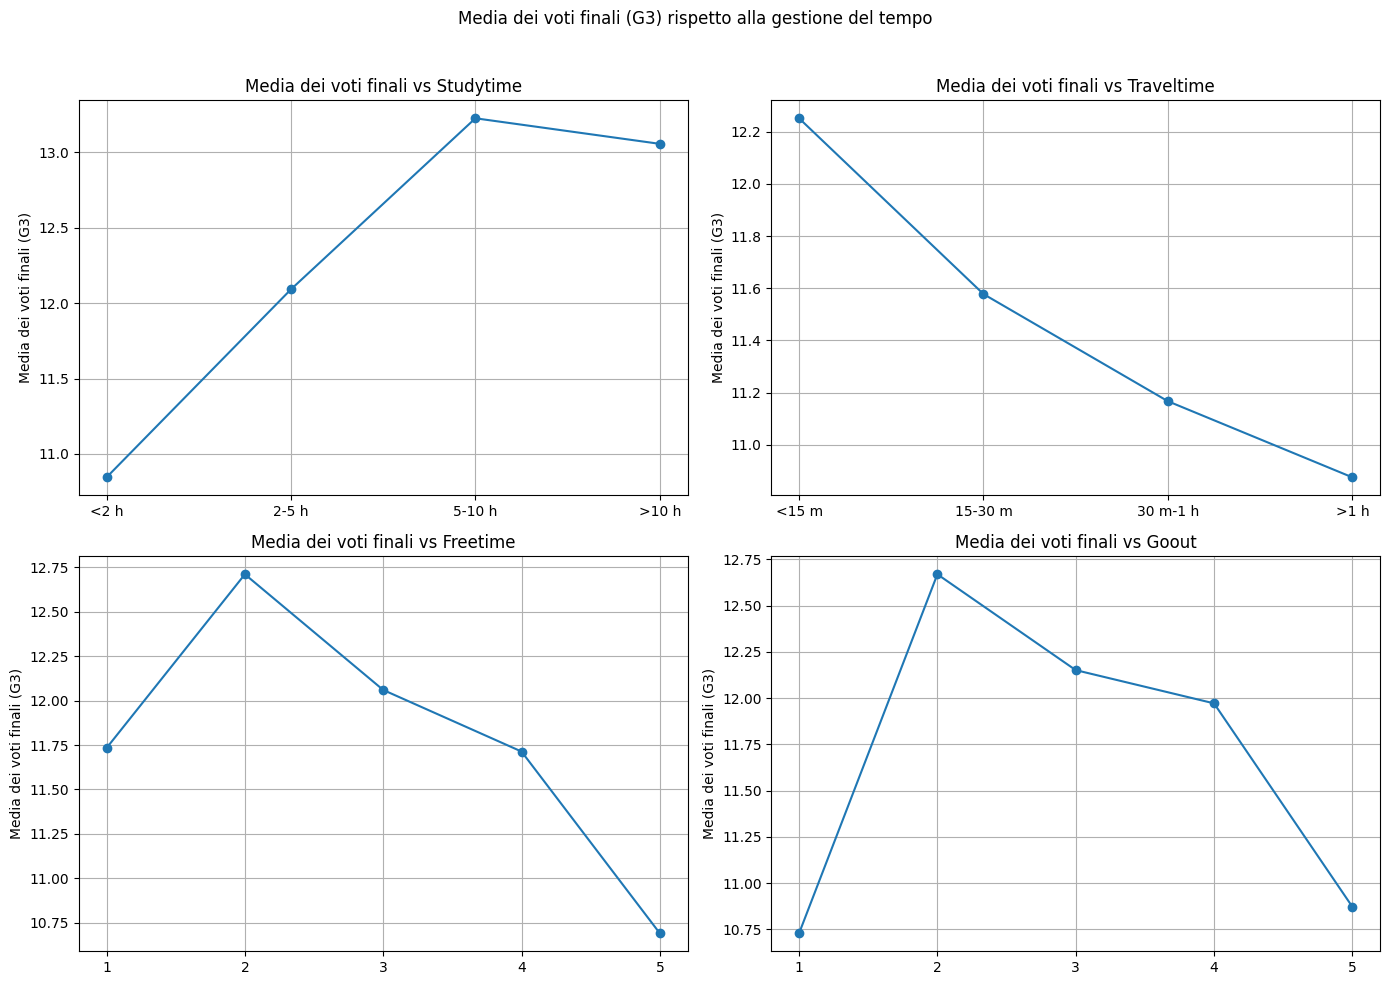

In [34]:
# Colonne di gestione del tempo
time_management_columns = ['studytime', 'traveltime', 'freetime', 'goout']

# Crea una figura e assi per i 4 grafici
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Media dei voti finali (G3) rispetto alla gestione del tempo')

# Mappa degli assi per facilitare il posizionamento
axes_map = {
    'studytime': (0, 0),
    'traveltime': (0, 1),
    'freetime': (1, 0),
    'goout': (1, 1)
}

# Etichette personalizzate per studytime e traveltime
studytime_labels = ['<2 h', '2-5 h', '5-10 h', '>10 h']
traveltime_labels = ['<15 m', '15-30 m', '30 m-1 h', '>1 h']

# Genera i grafici per ciascuna colonna di gestione del tempo
for col in time_management_columns:
    mean_scores = por.groupby(col)["G3"].mean()
    ax = axs[axes_map[col][0], axes_map[col][1]]
    ax.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-')
    ax.set_title(f'Media dei voti finali vs {col.capitalize()}')
    ax.set_ylabel('Media dei voti finali (G3)')
    ax.grid(True)
    
    # Imposta solo i valori interi sull'asse x
    xticks = range(int(mean_scores.index.min()), int(mean_scores.index.max()) + 1)
    ax.set_xticks(xticks)
    
    # Personalizza le etichette degli xticks per studytime e traveltime
    if col == 'studytime':
        ax.set_xticklabels(studytime_labels)
    elif col == 'traveltime':
        ax.set_xticklabels(traveltime_labels)
    else:
        ax.set_xticklabels([str(tick) for tick in xticks])

# Aggiungi un po' di spazio tra i grafici
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h5><a id="alchol">Consumo di Alcolici</a></h5>

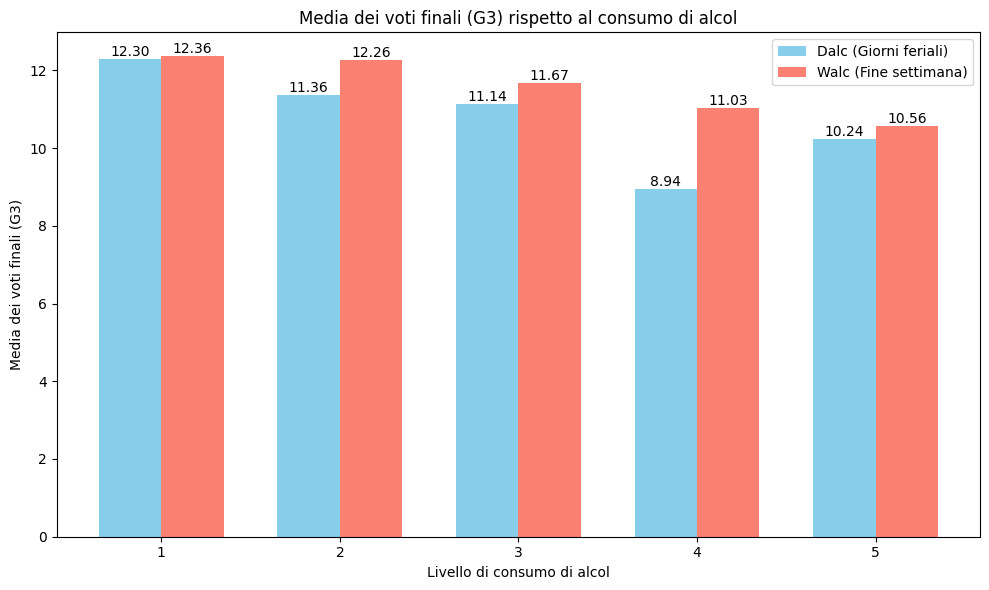

In [35]:
# Calcola la media dei voti finali per ciascun livello di consumo di alcol
dalc_mean = por.groupby('Dalc')['G3'].mean()
walc_mean = por.groupby('Walc')['G3'].mean()

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_width = 0.35
index = np.arange(1, 6)

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Crea le barre parallele per Dalc e Walc con colori specificati
bars1 = ax.bar(index - bar_width/2, dalc_mean[index], bar_width, label='Dalc (Giorni feriali)', color='skyblue')
bars2 = ax.bar(index + bar_width/2, walc_mean[index], bar_width, label='Walc (Fine settimana)', color='salmon')

# Aggiungi etichette e titolo
ax.set_xlabel('Livello di consumo di alcol')
ax.set_ylabel('Media dei voti finali (G3)')
ax.set_title('Media dei voti finali (G3) rispetto al consumo di alcol')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

# Aggiungi i valori sopra ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()

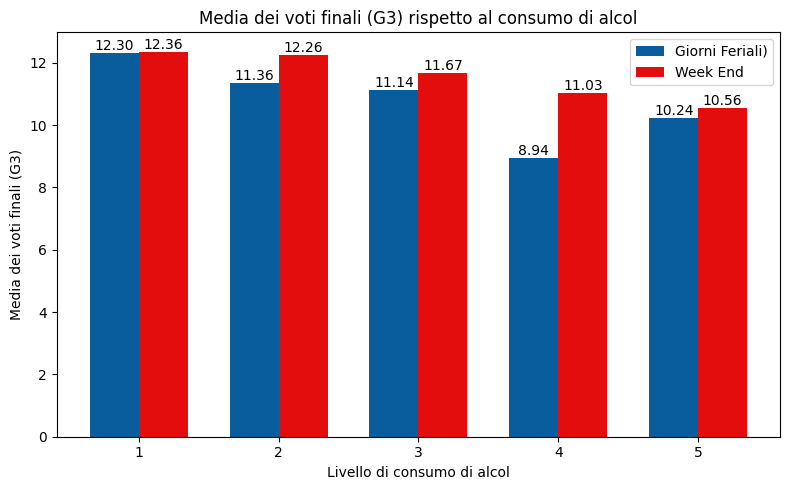

In [36]:
# Calcola la media dei voti finali per ciascun livello di consumo di alcol
dalc_mean = por.groupby('Dalc')['G3'].mean()
walc_mean = por.groupby('Walc')['G3'].mean()

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_width = 0.35
index = np.arange(1, 6)

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(8, 5))

# Crea le barre parallele per Dalc e Walc con colori specificati
color_fedu = '#095D9D'  # Colore personalizzato per Dalc
color_medu = '#E40D0D'  # Colore personalizzato per Walc

bars1 = ax.bar(index - bar_width/2, dalc_mean[index], bar_width, label='Giorni Feriali)', color=color_fedu)
bars2 = ax.bar(index + bar_width/2, walc_mean[index], bar_width, label='Week End', color=color_medu)

# Aggiungi etichette e titolo
ax.set_xlabel('Livello di consumo di alcol')
ax.set_ylabel('Media dei voti finali (G3)')
ax.set_title('Media dei voti finali (G3) rispetto al consumo di alcol')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

# Aggiungi i valori sopra ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()

<h5><a id="other_analysis">Ulteriori Analisi</a></h5>

In [37]:
# Gestione del tempo

# Consumo Alcolici

# Uso di internet

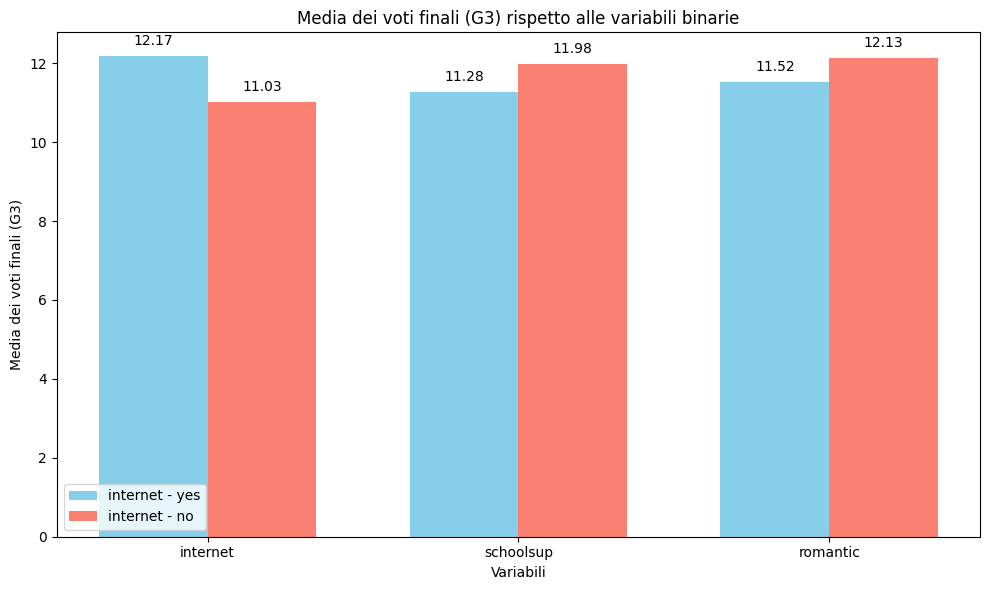

In [38]:
# Variabili binarie
binary_columns = ['internet', 'schoolsup', 'romantic']

# Calcola la media dei voti finali per ciascuna variabile binaria
means = {col: por.groupby(col)['G3'].mean() for col in binary_columns}

# Imposta la larghezza delle barre
bar_width = 0.35
index = np.arange(len(binary_columns))

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Crea le barre parallele per ciascuna variabile binaria
colors = ['skyblue', 'salmon']
for i, col in enumerate(binary_columns):
    yes_mean = means[col]['yes']
    no_mean = means[col]['no']
    
    bars1 = ax.bar(index[i] - bar_width/2, yes_mean, bar_width, label=f'{col} - yes' if i == 0 else "", color=colors[0])
    bars2 = ax.bar(index[i] + bar_width/2, no_mean, bar_width, label=f'{col} - no' if i == 0 else "", color=colors[1])
    
    # Aggiungi i valori sopra ogni barra
    ax.text(index[i] - bar_width/2, yes_mean + 0.2, f'{yes_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    ax.text(index[i] + bar_width/2, no_mean + 0.2, f'{no_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Aggiungi etichette e titolo
ax.set_xlabel('Variabili')
ax.set_ylabel('Media dei voti finali (G3)')
ax.set_title('Media dei voti finali (G3) rispetto alle variabili binarie')
ax.set_xticks(index)
ax.set_xticklabels(binary_columns)
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

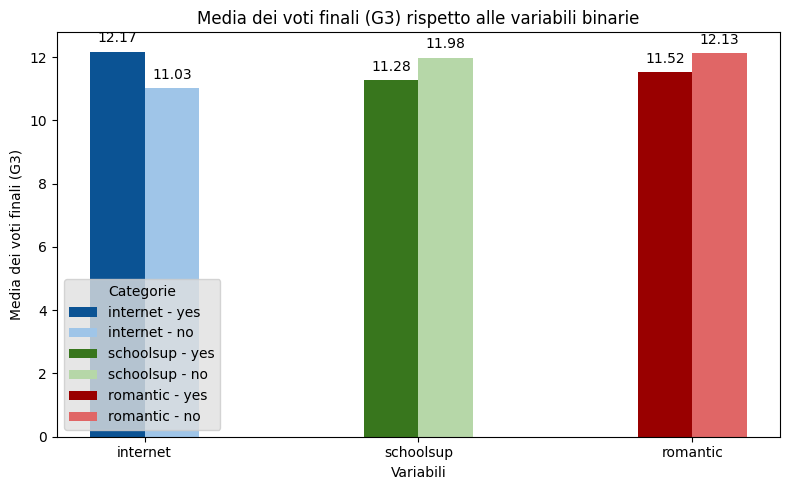

In [39]:
from matplotlib.patches import Patch

# Variabili binarie
binary_columns = ['internet', 'schoolsup', 'romantic']

# Calcola la media dei voti finali per ciascuna variabile binaria
means = {col: por.groupby(col)['G3'].mean() for col in binary_columns}

# Imposta la larghezza delle barre più stretta
bar_width = 0.2
index = np.arange(len(binary_columns))

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(8, 5))

# Definisce i colori per ciascuna variabile binaria
colors = {
    'internet': ['#0b5394', '#9fc5e8'],  # Blu deciso per 'yes', Blu tenue per 'no'
    'schoolsup': ['#38761d', '#b6d7a8'],  # Verde deciso per 'yes', Verde tenue per 'no'
    'romantic': ['#990000', '#e06666']  # Rosso deciso per 'yes', Rosso tenue per 'no'
}

# Crea le barre parallele per ciascuna variabile binaria
for i, col in enumerate(binary_columns):
    yes_mean = means[col]['yes']
    no_mean = means[col]['no']
    
    bars1 = ax.bar(index[i] - bar_width/2, yes_mean, bar_width, color=colors[col][0])
    bars2 = ax.bar(index[i] + bar_width/2, no_mean, bar_width, color=colors[col][1])
    
    # Aggiungi i valori sopra ogni barra
    ax.text(index[i] - bar_width/2, yes_mean + 0.2, f'{yes_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    ax.text(index[i] + bar_width/2, no_mean + 0.2, f'{no_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Aggiungi etichette e titolo
ax.set_xlabel('Variabili')
ax.set_ylabel('Media dei voti finali (G3)')
ax.set_title('Media dei voti finali (G3) rispetto alle variabili binarie')
ax.set_xticks(index)
ax.set_xticklabels(binary_columns)

# Crea una legenda personalizzata con sfondo grigio
legend_elements = [
    Patch(facecolor='#0b5394', label='internet - yes'),
    Patch(facecolor='#9fc5e8', label='internet - no'),
    Patch(facecolor='#38761d', label='schoolsup - yes'),
    Patch(facecolor='#b6d7a8', label='schoolsup - no'),
    Patch(facecolor='#990000', label='romantic - yes'),
    Patch(facecolor='#e06666', label='romantic - no')
]
legend = ax.legend(handles=legend_elements, title='Categorie')
legend.get_frame().set_facecolor('#e0e0e0')  # Imposta il colore di sfondo della legenda a grigio chiaro

# Mostra il grafico
plt.tight_layout()
plt.show()

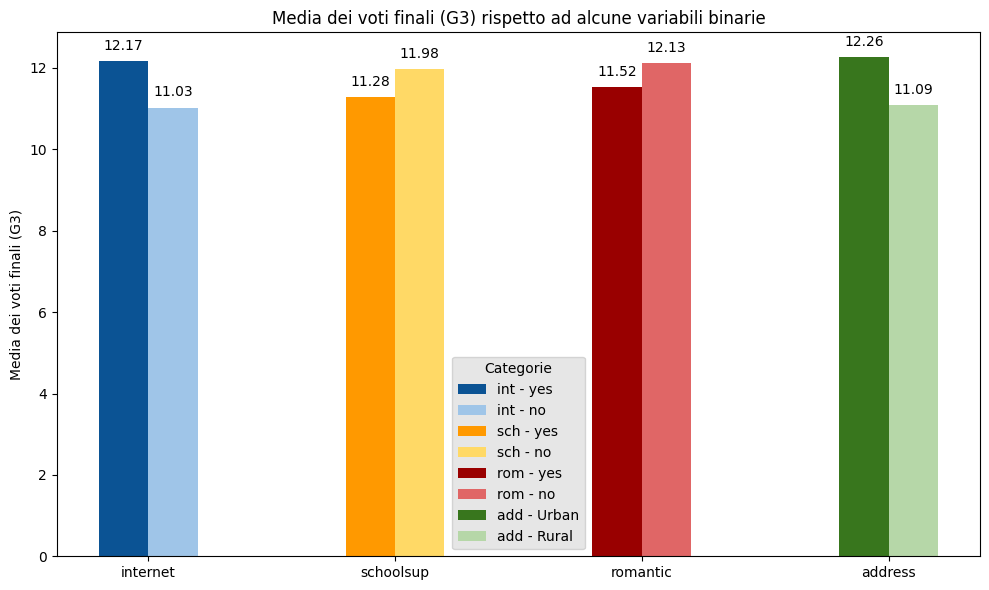

In [40]:
# Variabili binarie
binary_columns = ['internet', 'schoolsup', 'romantic', 'address']

# Calcola la media dei voti finali per ciascuna variabile binaria
means = {col: por.groupby(col)['G3'].mean() for col in binary_columns}

# Imposta la larghezza delle barre più stretta
bar_width = 0.2
index = np.arange(len(binary_columns))

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Definisce i colori per ciascuna variabile binaria
colors = {
    'internet': ['#0b5394', '#9fc5e8'],  # Blu deciso per 'yes', Blu tenue per 'no'
    'schoolsup': ['#ff9900', '#ffd966'],  # Arancione deciso per 'yes', Arancione tenue per 'no'
    'romantic': ['#990000', '#e06666'],  # Rosso deciso per 'yes', Rosso tenue per 'no'
    'address': ['#38761d', '#b6d7a8']  # Verde deciso per 'U', Verde tenue per 'R'
}

# Crea le barre parallele per ciascuna variabile binaria
for i, col in enumerate(binary_columns):
    yes_mean = means[col].get('yes', means[col].get('U', np.nan))
    no_mean = means[col].get('no', means[col].get('R', np.nan))
    
    bars1 = ax.bar(index[i] - bar_width/2, yes_mean, bar_width, color=colors[col][0])
    bars2 = ax.bar(index[i] + bar_width/2, no_mean, bar_width, color=colors[col][1])
    
    # Aggiungi i valori sopra ogni barra
    if not np.isnan(yes_mean):
        ax.text(index[i] - bar_width/2, yes_mean + 0.2, f'{yes_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    if not np.isnan(no_mean):
        ax.text(index[i] + bar_width/2, no_mean + 0.2, f'{no_mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Aggiungi etichette e titolo
ax.set_xlabel('')
ax.set_ylabel('Media dei voti finali (G3)')
ax.set_title('Media dei voti finali (G3) rispetto ad alcune variabili binarie')
ax.set_xticks(index)
ax.set_xticklabels(binary_columns)

# Crea una legenda personalizzata con sfondo grigio
legend_elements = [
    Patch(facecolor='#0b5394', label='int - yes'),
    Patch(facecolor='#9fc5e8', label='int - no'),
    Patch(facecolor='#ff9900', label='sch - yes'),
    Patch(facecolor='#ffd966', label='sch - no'),
    Patch(facecolor='#990000', label='rom - yes'),
    Patch(facecolor='#e06666', label='rom - no'),
    Patch(facecolor='#38761d', label='add - Urban'),
    Patch(facecolor='#b6d7a8', label='add - Rural')
]
legend = ax.legend(handles=legend_elements, title='Categorie')
legend.get_frame().set_facecolor('#e0e0e0')  # Imposta il colore di sfondo della legenda a grigio chiaro

# Mostra il grafico
plt.tight_layout()
plt.show()

<h1><a id="pda">PDA</a></h1>

<p>Previsioni del voto finale tramite algoritmi di machine learnig</p>

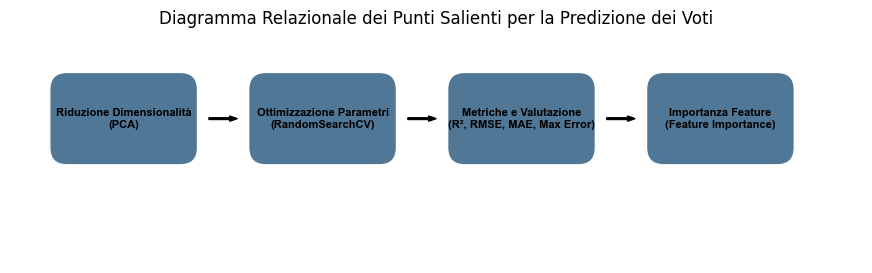

In [41]:
# Definisci i passaggi
steps = [
    "Riduzione Dimensionalità\n(PCA)",
    "Ottimizzazione Parametri\n(RandomSearchCV)",
    "Metriche e Valutazione\n(R², RMSE, MAE, Max Error)",
    "Importanza Feature\n(Feature Importance)"
]

# Definisci la posizione e la dimensione dei blocchi
x = 0
y = 0
width = 2
height = 1
space = 1.5
arrow_space = 0.5

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(11, 3))
ax.set_xlim(-1, len(steps) * (width + space))
ax.set_ylim(-2, 2)
ax.axis('off')

# Aggiungi i blocchi e le frecce
for i, step in enumerate(steps):
    box = FancyBboxPatch(
        (x + i * (width + space), y),
        width,
        height,
        boxstyle="round,pad=0.3",
        edgecolor='white',
        facecolor='#507796'
    )
    ax.add_patch(box)
    ax.text(
        x + i * (width + space) + width / 2,
        y + height / 2,
        step,
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        fontname='Arial'
    )
    if i < len(steps) - 1:
        arrow = FancyArrow(
            x + (i + 1) * (width + space) - space + arrow_space,  
            y + height / 2,
            space - 2 * arrow_space,
            0,
            width=0.03,
            length_includes_head=True,
            color='black'
        )
        ax.add_patch(arrow)

plt.title("Diagramma Relazionale dei Punti Salienti per la Predizione dei Voti", fontsize=12)
plt.show()


In [42]:
por_enc.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Per dimostrare l'efficacia di diversi algoritmi di machine learning nella previsione del voto finale, sono stati testati una gamma diversificata di modelli. Questo approccio didattico, ha permesso di:

- Apprendere come ogni algoritmo gestisce i dati e identifica le caratteristiche rilevanti

- Valutare le performance relative di ciascun modello, fornendo una comprensione pratica delle loro capacità e limitazioni

- Comprendere le differenze fondamentali tra gli algoritmi, facilitando la scelta del modello più adatto per previsioni accurate

<b>Algoritmi usati</b>

1. [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html): Algoritmo di regressione basato su Support Vector Machines. Efficace per dati di alta dimensione.

2. [GradientBoosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html): Metodo di ensemble che costruisce alberi sequenziali.
Alta accuratezza, ma richiede più tempo di addestramento.

3. [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html): Metodo di ensemble che combina multiple istanze dello stesso modello. Riduce la varianza e migliora la stabilità.

4. [RandomForest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): Algoritmo basato su ensemble di alberi decisionali.
Buona capacità di generalizzazione e gestione della variabilità nei dati.


5. [DecisionTree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): Algoritmo basato su alberi singoli. Facile interpretabilità, ma suscettibile all'overfitting.

6. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Modello di regressione lineare semplice. Base di confronto per valutare la complessità degli altri due modelli.

7. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html): Variante della regressione lineare che include una penalità. Migliora la generalizzazione riducendo l'overfitting.

8. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): Variante della regressione lineare che effettua selezione delle caratteristiche. Utile per ridurre il numero di feature rilevanti.

9. [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html): Modello di apprendimento profondo. Capacità di catturare pattern complessi nei dati, ma necessita di molti dati e tempo di addestramento.

10. [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html):Algoritmo di classificazione e regressione basato sulla vicinanza. Semplice da implementare, ma computationalmente costoso per dataset grandi.

In [43]:
# 1. Separazione delle feature e del target
X = por_enc.drop(columns=['G3'])
y = por_enc['G3']

<h3><a id="reduce_dim">Riduzione della Dimensionalità</a></h3>

In [44]:
# 2. Riduzione della Dimensionalità


# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# PCA senza specificare il numero di componenti
pca = PCA()
pca.fit(X_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

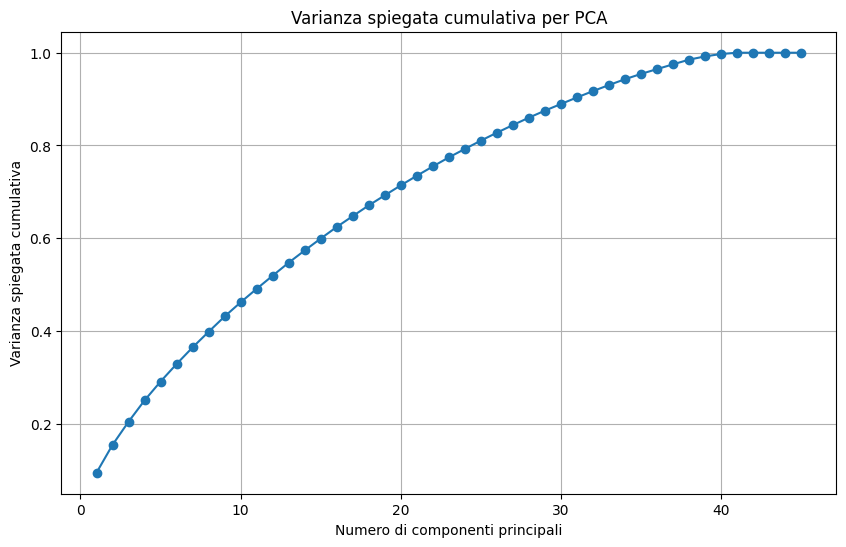

In [45]:

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [46]:
# Scegliere il numero di componenti che spiegano almeno il 95% della varianza
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Riduzione della dimensionalità con il numero ottimale di componenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)


Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [47]:
feature_labels = [f'PC{i+1}' for i in range(num_components)]

In [48]:
# Salva i nomi delle colonne originali prima di applicare PCA
col_names = X.columns.tolist()

# Estrazione dei coefficienti del PCA
pca_components = pca.components_

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
original_feature_names = X.columns.tolist()

In [49]:
feature_importances = np.sum(np.abs(pca_components), axis=0)

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
pca_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importances})

# Ordinamento delle feature per importanza
pca_importance_df = pca_importance_df.sort_values(by='Importance', ascending=False)


In [50]:
# 3. Divisione del dataset in training e test

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


<h3><a id="train">Ottimizzazione dei Parametri e Addestramento</a></h3>

In [51]:
# 4. Ottimizzazione dei parametri di ogni modello

# Definizione delle distribuzioni dei parametri

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}

param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

param_dist_lr = {}

param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

param_dist_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_dist_nn = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [2000, 3000, 4000]  # Aumenta il numero massimo di iterazioni
}

In [52]:
# 5. Addestramento di ogni modello ottimizzato

# Definizione dei modelli
models = {
    'SVR': (SVR(kernel = 'rbf'), param_dist_svr),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'Bagging': (BaggingRegressor(random_state=42), param_dist_bagging),    
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'Lasso': (Lasso(random_state=42), param_dist_lasso),
    'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}


In [53]:
# RandomizedSearchCV per ogni modello
random_searches = {}
training_times = {}

# Disabilitare temporaneamente i warning
warnings.filterwarnings("ignore", category=UserWarning)

for model_name, (model, param_dist) in models.items():
    try:
        print(f"Starting training for {model_name}")
        start_time = time.time()
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
        random_search.fit(X_train, y_train)

        end_time = time.time()

        random_searches[model_name] = random_search
        training_times[model_name] = end_time - start_time

        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Training time for {model_name}: {training_times[model_name]:.2f} seconds")
        print("------")

    except UserWarning as e:
        print(f"A UserWarning occurred while training {model_name}: {e}")
    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

warnings.filterwarnings("default", category=UserWarning)

print("Training complete for all models.")

Starting training for SVR
Best parameters for SVR: {'C': np.float64(18.323608778806236), 'epsilon': np.float64(0.8553614103176524), 'gamma': np.float64(0.005137809405606009)}
Training time for SVR: 3.34 seconds
------
Starting training for GradientBoosting
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.05286004537658223), 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 463, 'subsample': np.float64(0.7637017332034828)}
Training time for GradientBoosting: 27.75 seconds
------
Starting training for Bagging
Best parameters for Bagging: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0}
Training time for Bagging: 6.40 seconds
------
Starting training for RandomForest
Best parameters for RandomForest: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 84}
Training time for RandomForest: 6.36 seconds
------
Starting training for DecisionTree
Best parameters for DecisionTree: {


<h3><a id="valutation">Valutazione</a></h3>

In [54]:
# 6. Previsione e valutazione di ogni modello

results = {}

# Loop attraverso ogni modello e calcolare le metriche
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)

    # Calcolare le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    results[model_name] = {'R^2': round(r2, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2), 'Max Err': round(max_err, 2)}

results_df = pd.DataFrame(results)
training_times_df = pd.Series(training_times, name="Train Time (s)")


results_df = results_df.T

final_results_df = results_df.join(training_times_df)

In [55]:
final_results_df.columns.values

array(['R^2', 'RMSE', 'MAE', 'Max Err', 'Train Time (s)'], dtype=object)

In [57]:
print(tabulate(final_results_df, headers='keys', tablefmt='github'))

|                  |   R^2 |   RMSE |   MAE |   Max Err |   Train Time (s) |
|------------------|-------|--------|-------|-----------|------------------|
| SVR              |  0.8  |   1.4  |  0.92 |      9.98 |        3.33957   |
| GradientBoosting |  0.69 |   1.74 |  1.22 |      7.51 |       27.749     |
| Bagging          |  0.59 |   2.01 |  1.47 |      8.46 |        6.40111   |
| RandomForest     |  0.6  |   1.98 |  1.45 |      8.55 |        6.35542   |
| DecisionTree     |  0.45 |   2.32 |  1.76 |     10.26 |        0.154983  |
| LinearRegression |  0.8  |   1.41 |  0.96 |      9.99 |        0.0136199 |
| Ridge            |  0.8  |   1.4  |  0.95 |      9.94 |        0.193542  |
| Lasso            |  0.8  |   1.4  |  0.95 |      9.9  |        0.0920641 |
| NeuralNetwork    |  0.71 |   1.67 |  1.19 |      9.44 |       19.0669    |
| KNN              |  0.48 |   2.24 |  1.69 |     10.37 |        0.062109  |


<h3><a id="f_importance">Importanza delle features</a></h3>


In [58]:
# 7. Visualizzazione dell'importanza delle feature

In [59]:
# Mantenere le etichette delle feature originali per la visualizzazione
feature_labels = X_scaled.columns
# Dizionario per le importanze delle feature
feature_importances_dict = {}

In [60]:
# Estrai le importanze delle feature per ogni modello
for model_name, search in random_searches.items():
    if hasattr(search.best_estimator_, 'feature_importances_'):
        # Per modelli che hanno l'attributo 'feature_importances_'
        feature_importances_dict[model_name] = search.best_estimator_.feature_importances_
    elif hasattr(search.best_estimator_, 'coef_'):
        # Per modelli che hanno l'attributo 'coef_' (come modelli lineari)
        feature_importances_dict[model_name] = np.abs(search.best_estimator_.coef_)

# Creazione del DataFrame delle importanze delle feature
# Per i modelli che utilizzano PCA, è necessario mappare le importanze dei componenti principali alle feature originali
def get_feature_importances_from_pca(pca, feature_importances_dict, original_feature_labels):
    component_loadings = pca.components_.T
    importance_dict = {}
    for model_name, importances in feature_importances_dict.items():
        if isinstance(importances, np.ndarray) and len(importances) == pca.n_components_:
            # Importanze dei componenti principali
            importances_matrix = np.dot(component_loadings, np.diag(importances))
            # Calcola l'importanza totale per ogni feature
            feature_importances = np.abs(importances_matrix).sum(axis=1)
            importance_dict[model_name] = feature_importances
        else:
            # Modelli senza importanze o importanze non compatibili
            importance_dict[model_name] = np.nan * len(original_feature_labels)
    return pd.DataFrame(importance_dict, index=original_feature_labels)


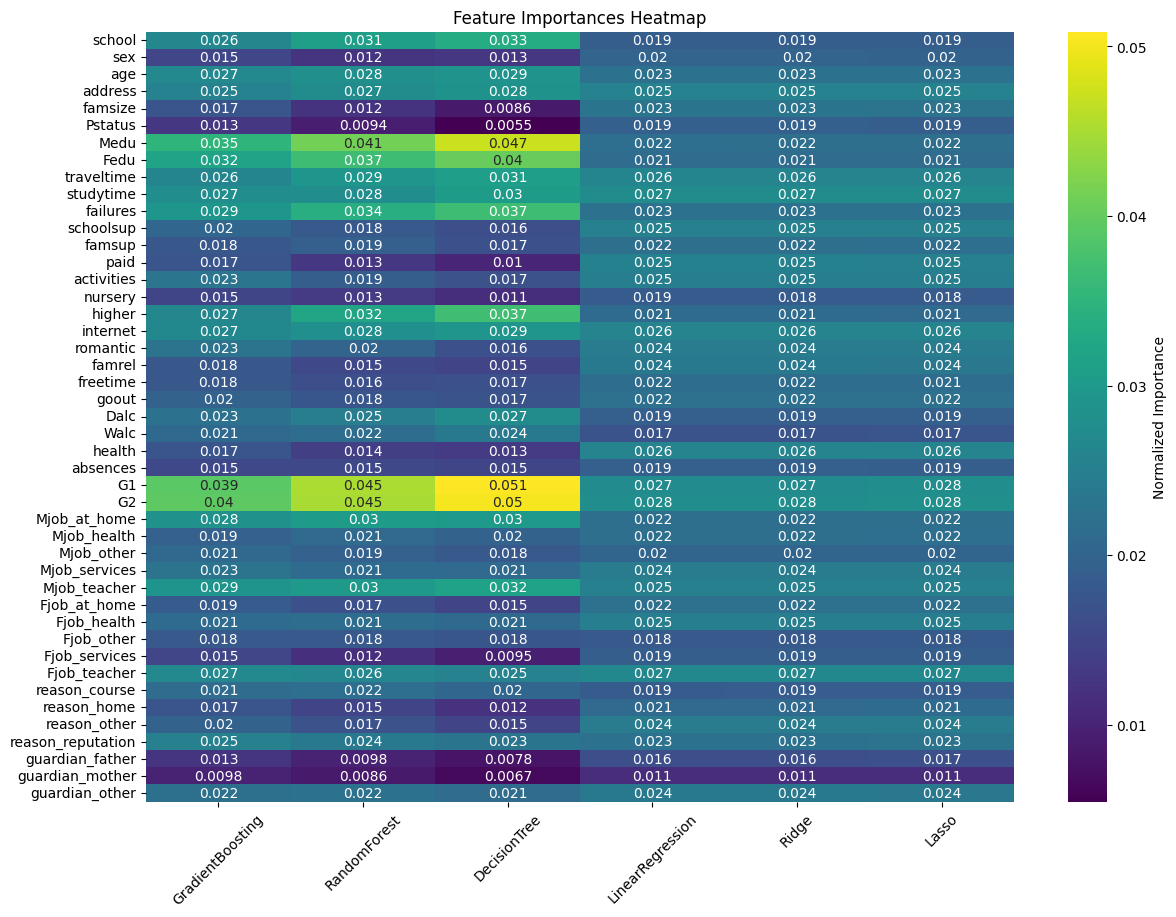

In [61]:
feature_importances_df = get_feature_importances_from_pca(pca, feature_importances_dict, feature_labels)

# Normalizzazione delle importanze delle feature (opzionale)
feature_importances_df = feature_importances_df.apply(lambda x: x / np.nansum(x), axis=0)

# Visualizzazione della heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Importance'})
plt.title('Feature Importances Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Ruota le etichette dei modelli per una migliore leggibilità
plt.show()

<h1>Web Bibliografy</h1>

2. Riduzione della dimensionalità

Normalization method: 

    [](https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1)

    [](https://www.datacamp.com/tutorial/normalization-in-machine-learning)

    [](https://www.geeksforgeeks.org/what-is-data-normalization/)

DimensionalityReduction Techniques
    
    [](https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c)

    [](https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567)


# 4. Ottimizzazione dei parametri di ogni modello

'''
Supervised ML regression algorithms

    https://www.onlinemanipal.com/blogs/popular-regression-algorithms-in-machine-learning

    https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

    https://www.geeksforgeeks.org/regression-in-machine-learning/



Parameter optimization machine learning models

    https://www.linkedin.com/pulse/machine-learning-optimization-techniques-bilal-el-jamal/

    https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
    
'''
'''
math explained 


Random forest:
    https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

Decision Tree:
    https://ankitnitjsr13.medium.com/math-behind-decision-tree-algorithm-2aa398561d6d

Gradient Boosting Regressor:
    https://medium.com/geekculture/gradient-boosting-for-regression-math-intuition-71f9a9826035#:~:text=Gradient%20Boosting%20starts%20by%20making,made%20by%20the%20previous%20tree.
    
SVR
    https://medium.com/@rahulrastogi1104/support-vector-regression-and-its-mathematical-implementation-b6377898cd74

Lasso & Ridge Regression
    https://medium.com/codex/mathematical-background-of-lasso-and-ridge-regression-23b74737c817

KNN


data binning: https://medium.com/@mose.kabungo/binning-explained-557aa3cce591